#Proyecto Final - Entrega Final

##Consigna

Obtener datos de diversas fuentes como APIs o Bases de datos públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar una pregunta de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos

##Introducción

**Contexto comercial:** Una empresa desarrolladora de videojuegos para teléfonos celulares desea optimizar los recursos destinados a la retención de sus usuarios.

La empresa identificó que si un usuario vuelve a utilizar una aplicación al día siguiente de instalarla, es muy probable que la siga usando por un mayor periodo.

Por esto quiere poder identificar a aquellos usuarios que solo utilizarán la aplicación el día de la instalación para enfocar su campaña de retención en ellos (llamados "Churners")

**Problema Comercial:**  Hoy en dia aproximadamente el 70% de los usuarios a nivel compañia churnean al dia 0, es decir, no juegan mas alla del dia de instalación. Es vital para la salud de la empresa poder predecir con anticipacion que usuario va a abandonar el juego para poder enfocar los esfuerzos comerciales y de marketing en ellos.

**Objetivo:** Nuestro objetivo es analizar una muestra de usuarios y buscar desarrollar algún algoritmo que nos permite identificar con precisión los potenciales "Churners".
Estó permitirá a la empresa focalizar de forma más eficiente las campañas de retención.

**Contexto analítico:** Se utiizara una base de datos con información clasificatoria de los usuarios identificados como churners/no churners. La misma servirá de base para el modelo de predicción a elaborar

**Hipotesis:** Es posible saber con antelacion si un usuario no va a volver al juego en el dia posterior a su instalacion, basados en las caracteristicas del mismo y en la cantidad de eventos que realiza en su dia 0.

##Data Set - Base de usuarios

Tal como se mencinó anteriormente, el objetivo del siguiente trabajo va a ser desarrollar un modelo que permita predecir con un determinado grado de confianza si un usuario va a abandonar el juego dia posterior de las instalacion. A este tipo de usuarios se los conoce como "Churners"

Para esto importaremos una base de datos ocn información de los usuarios incorporados durante los primeros días de Julio
Además de la fecha de instalación, esta base cuenta con la siguiente información caetegórica


*   ID de usuario
*   OS del dispositivo en el cual se instalo la app
*   Si instalaron la app directamente desde la tienda o a través de un banner
*   País y Provincia
*   Si cuenta o no con una subscripción "pro"
*   Si el usuario se puede clasificar como "Churner"

Al mismo tiempo tenemos información sobre la cantidad de "eventos" que realizó al utilizar la app

In [ ]:
import pandas as pd
import numpy as np
sheet_url = "https://docs.google.com/spreadsheets/d/11CRwxEJD5LV4WcRyqNJiMriwt8KfTVXgnjlECkAr6Q8/export?format=csv&gid=666920416"
ds1 = pd.read_csv(sheet_url, sep=",",index_col=0)
ds1.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_6,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1,1,1,1,0,0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3,7,8,6,5,0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1,6,6,6,0,0,0.009298,Churner
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,Android,Non Organic,ar,Santa Fe,False,12,14,46,65,0,0,0.030425,Non Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3,9,9,20,0,0,0.009078,Churner


In [ ]:
#Exploracion del Dataset
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 0 to 61914
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   install_date    61915 non-null  object 
 1   user_id         61915 non-null  object 
 2   platform        61915 non-null  object 
 3   source_type     61915 non-null  object 
 4   country         61915 non-null  object 
 5   country_region  61744 non-null  object 
 6   is_pro          60906 non-null  object 
 7   event_1         61915 non-null  int64  
 8   event_2         61915 non-null  int64  
 9   event_3         61915 non-null  int64  
 10  event_4         61915 non-null  int64  
 11  event_5         61915 non-null  int64  
 12  event_6         61915 non-null  int64  
 13  event_7         61915 non-null  float64
 14  churn_target    61915 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 7.6+ MB


## Analisis de variable numéricas

Para entender mejor el fenómeno de Churning, debemos analizar la base original para poder detectar y limpiar los datos que generan ruido en la misma.
En principio, empezamos por eliminar aquellos usuarios que aun no pueden ser identificados como Churner / Non Churner

In [ ]:
df_sin_resolve = ds1.loc[ds1['churn_target']!="Resolve"]
df_sin_resolve.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_6,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1,1,1,1,0,0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3,7,8,6,5,0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1,6,6,6,0,0,0.009298,Churner
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,Android,Non Organic,ar,Santa Fe,False,12,14,46,65,0,0,0.030425,Non Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3,9,9,20,0,0,0.009078,Churner


### Duplicados

Nos aseguramos que no halla duplicados

In [ ]:
#Borrado de duplicados
print(df_sin_resolve.shape)
df_sin_duplicados= df_sin_resolve.drop_duplicates()
print(df_sin_duplicados.shape)

(50435, 15)
(50435, 15)


### Nulos

Tenemos Nulos? Cuanto? Como podemos tratarlos?

In [ ]:
#Analisis de nulos
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_sin_duplicados.isnull().sum()/df_sin_duplicados.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

is_pro            1.861802
country_region    0.269654
dtype: float64

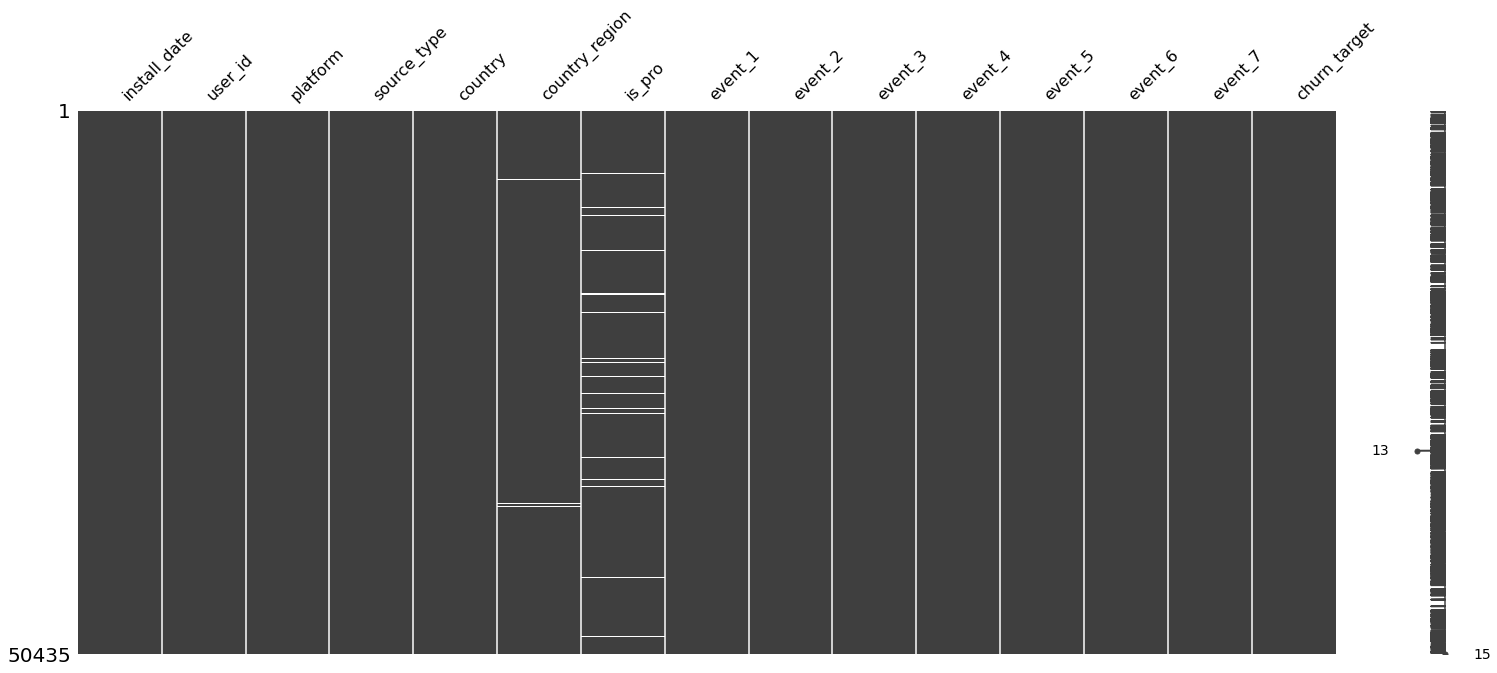

In [ ]:
import missingno as msno
msno.matrix(df_sin_duplicados)

Al ver que solo dos columnas contienen nulos, procedemos a eliminarlos

In [ ]:
df_sin_nulos = df_sin_duplicados.dropna()

(49361, 15)
(49361, 15)


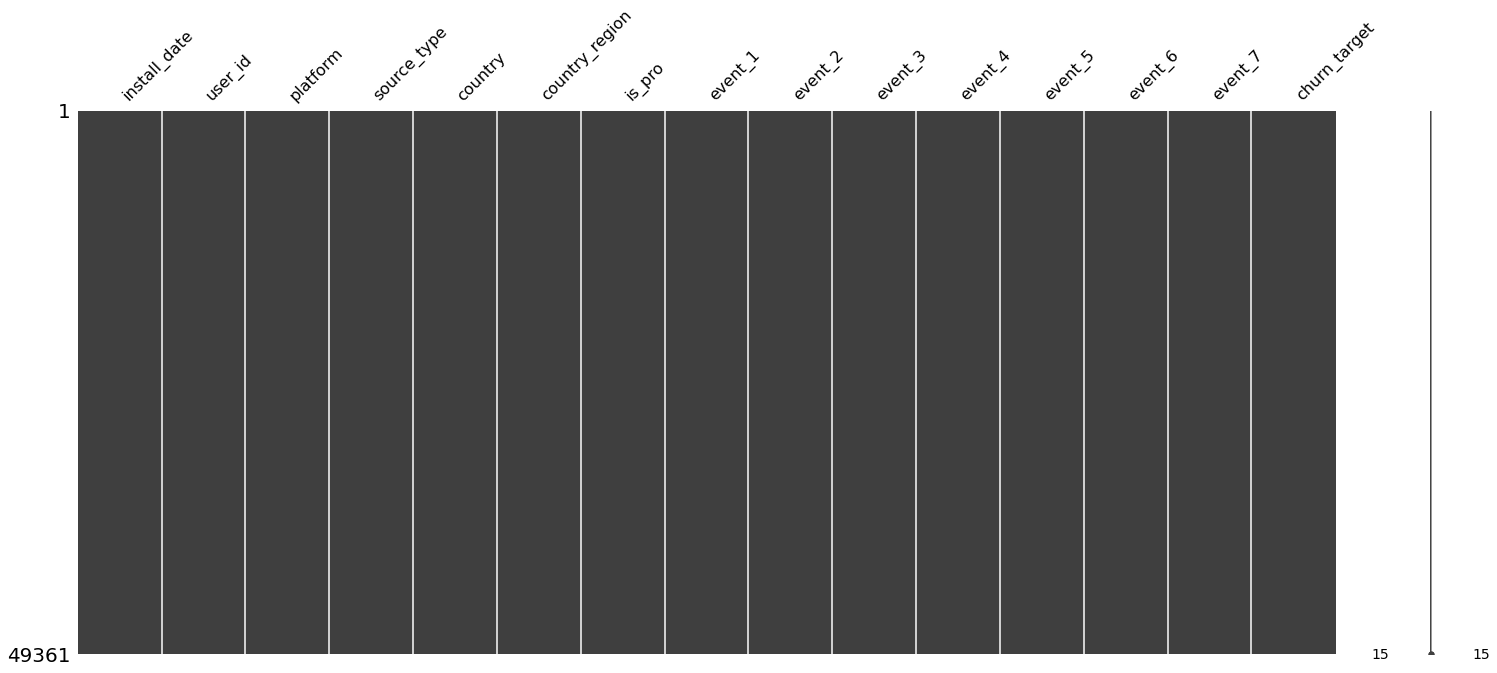

In [ ]:
#Revisamos
print(df_sin_nulos.shape)
train= df_sin_nulos.dropna()
print(train.shape)
msno.matrix(df_sin_nulos)

Tras revisar el data set resultante confirmamos que no quedan nulos en nuestra base

### Outliers

Finalmente revisamos si nuestra base cuenta con muchos valores que se exedan de los limites del primer y tercer cuartil. Estos valores se consideran atipicos y deben ser tratados ya que contaminan nuestra muestra

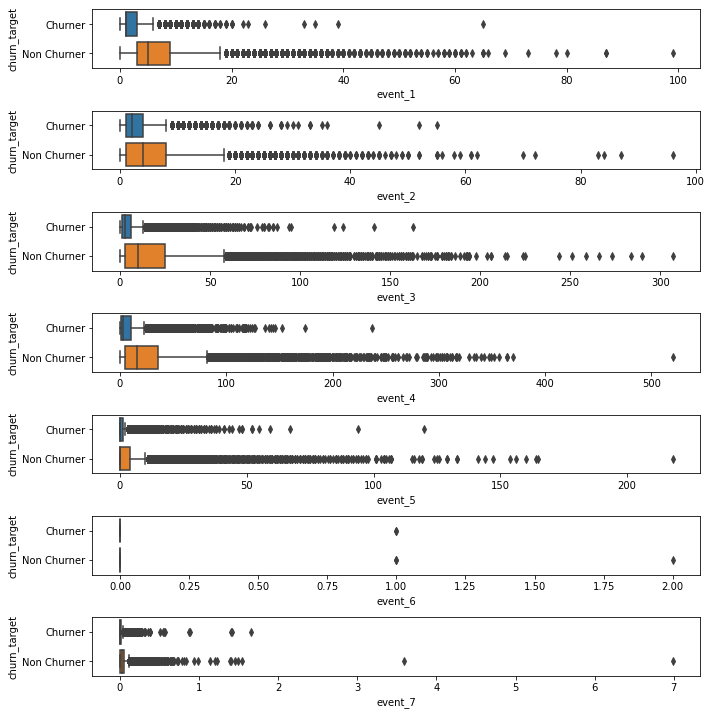

In [ ]:
#Vamos a ver si las variables numericas tienen outliers
import seaborn as sns
import matplotlib.pyplot as plt

f, axs = plt.subplots(7, 1, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4]))
box_1 = sns.boxplot(data=df_sin_nulos, x="event_1", y="churn_target",  ax=axs[0])
box_2 = sns.boxplot(data=df_sin_nulos, x="event_2", y="churn_target",  ax=axs[1])
box_3 = sns.boxplot(data=df_sin_nulos, x="event_3", y="churn_target",  ax=axs[2])
box_4 = sns.boxplot(data=df_sin_nulos, x="event_4", y="churn_target",  ax=axs[3])
box_5 = sns.boxplot(data=df_sin_nulos, x="event_5", y="churn_target",  ax=axs[4])
box_6 = sns.boxplot(data=df_sin_nulos, x="event_6", y="churn_target",  ax=axs[5])
box_7 = sns.boxplot(data=df_sin_nulos, x="event_7", y="churn_target",  ax=axs[6])
#box_1.set(xscale = 'log')
#box_2.set(xscale = 'log')
#box_3.set(xscale = 'log')
#box_4.set(xscale = 'log')
#box_5.set(xscale = 'log')
#box_6.set(xscale = 'log')
#box_7.set(xscale = 'log')
f.tight_layout()

Vemos que hay muchos valores por encima del limite intercuartilico, podríamos eliminarlos pero para evitar perder esa información optamos por remplazar los outliers por el valor límite

In [ ]:
import numpy as np
def imputar_outliers_IQR(df_sin_nulos):
   q1=df_sin_nulos.quantile(0.25)
   q3=df_sin_nulos.quantile(0.75)
   IQR=q3-q1
   upper = df_sin_nulos[~(df_sin_nulos>(q3+1.5*IQR))].max()
   lower = df_sin_nulos[~(df_sin_nulos<(q1-1.5*IQR))].min()
   df_sin_nulos = np.where(df_sin_nulos > upper, # si el valor es mayor al q3
                 df_sin_nulos.quantile(0.75), # remplazar por el limite superior
                 np.where(df_sin_nulos < lower, # en caso contrario si es menor que el lower limit
                          df_sin_nulos.quantile(0.25), # reemplazar por el limita inferior
                          df_sin_nulos) # si ninguna de las dos cosas anteriores ocurre dejar el dato
                 )
   return df_sin_nulos

In [ ]:
prueba = df_sin_nulos[['event_1','event_2','event_3','event_4','event_5','event_6','event_7']]
prueba.columns

Index(['event_1', 'event_2', 'event_3', 'event_4', 'event_5', 'event_6',
       'event_7'],
      dtype='object')

In [ ]:
columnas=prueba.columns
df_sin_nulos[columnas]=imputar_outliers_IQR(df_sin_nulos[columnas])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


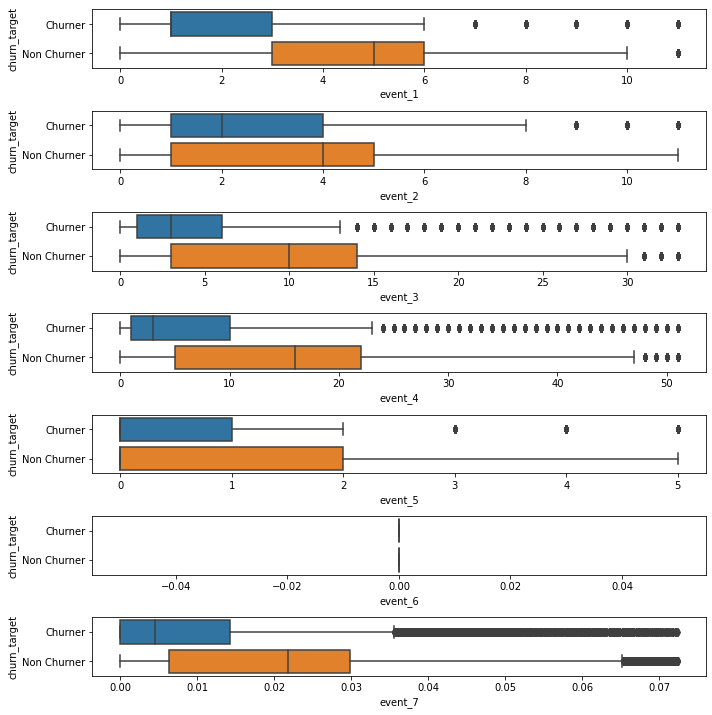

In [ ]:
#vuelvo a chequear outliers

f, axs = plt.subplots(7, 1, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4]))
box_1 = sns.boxplot(data=df_sin_nulos, x="event_1", y="churn_target",  ax=axs[0])
box_2 = sns.boxplot(data=df_sin_nulos, x="event_2", y="churn_target",  ax=axs[1])
box_3 = sns.boxplot(data=df_sin_nulos, x="event_3", y="churn_target",  ax=axs[2])
box_4 = sns.boxplot(data=df_sin_nulos, x="event_4", y="churn_target",  ax=axs[3])
box_5 = sns.boxplot(data=df_sin_nulos, x="event_5", y="churn_target",  ax=axs[4])
box_6 = sns.boxplot(data=df_sin_nulos, x="event_6", y="churn_target",  ax=axs[5])
box_7 = sns.boxplot(data=df_sin_nulos, x="event_7", y="churn_target",  ax=axs[6])
#box_1.set(xscale = 'log')
#box_2.set(xscale = 'log')
#box_3.set(xscale = 'log')
#box_4.set(xscale = 'log')
#box_5.set(xscale = 'log')
#box_6.set(xscale = 'log')
#box_7.set(xscale = 'log')
f.tight_layout()

Vemos que todavia hay outliers pero entendemos que es por la nueva distribucion del DF, pensamos que de seguir iterando la funcion de limpieza estariamos alterando demasiado la base original.

Por otro lado, el evento 6 no aporta nada al dataset, por lo que podemos eliminarlo.

###Recodificación de Variables Categóricas

El ultimos paso en la adecuación de la base es el asociar nuestras variables categóricas a valores numéricos. Esto permitirá la elaboración de algoritmos predictivos sobre las mismas

In [ ]:
#Recodificar variables categoricas
df_sin_nulos = df_sin_nulos.drop(['event_6'], axis =1)
df_sin_nulos.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1.0,1.0,1.0,1.0,0.0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3.0,7.0,8.0,6.0,5.0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1.0,6.0,6.0,6.0,0.0,0.009298,Churner
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,Android,Non Organic,ar,Santa Fe,False,5.0,5.0,14.0,21.0,0.0,0.030425,Non Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3.0,9.0,9.0,20.0,0.0,0.009078,Churner


In [ ]:
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49361 entries, 0 to 61914
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   install_date    49361 non-null  object 
 1   user_id         49361 non-null  object 
 2   platform        49361 non-null  object 
 3   source_type     49361 non-null  object 
 4   country         49361 non-null  object 
 5   country_region  49361 non-null  object 
 6   is_pro          49361 non-null  object 
 7   event_1         49361 non-null  float64
 8   event_2         49361 non-null  float64
 9   event_3         49361 non-null  float64
 10  event_4         49361 non-null  float64
 11  event_5         49361 non-null  float64
 12  event_7         49361 non-null  float64
 13  churn_target    49361 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.7+ MB


Veamos que columnas pueden ser reemplazadas con variables dummies, y reemplacemoslas.

In [ ]:
# columnas categoricas con dos unicas posibilidades
col_dummies=[x for x in df_sin_nulos.columns if (df_sin_nulos[x].dtype=='O' and len(df_sin_nulos[x].unique()) ==2)]
print(col_dummies)
# crear las variables dummies
df_dummies=pd.get_dummies(df_sin_nulos[col_dummies])
# concatenar con el dataframe original
df_final=pd.concat([df_sin_nulos,df_dummies],axis=1)
# Borrar de columnas originales
df_final=df_final.drop(columns=col_dummies)
df_final.head()

['platform', 'source_type', 'is_pro', 'churn_target']


,install_date,user_id,country,country_region,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,platform_iOS,source_type_Non Organic,source_type_Organic,is_pro_False,is_pro_True,churn_target_Churner,churn_target_Non Churner
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,ar,Buenos Aires,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,1,0,1,0,1,0
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,ar,Buenos Aires,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,1,0,1,0,1,0
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,ar,Mendoza,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,1,0,1,0,1,0
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,ar,Santa Fe,5.0,5.0,14.0,21.0,0.0,0.030425,1,0,1,0,1,0,0,1
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,ar,Santa Fe,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,1,0,1,0,1,0


Observamos que algunas columnas son redundantes como "is_pro_True" y "is_pro_False". Para simplificar la base, eliminamos las columnas redundantes

In [ ]:
df_final=df_final.drop(['platform_iOS','source_type_Non Organic',"is_pro_False",'churn_target_Non Churner'], axis = 1)
df_final = df_final.rename(columns = {'churn_target_Churner':'Churner'})
df_final.head()

,install_date,user_id,country,country_region,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,Churner
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,ar,Buenos Aires,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,0,1
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,ar,Buenos Aires,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,0,1
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,ar,Mendoza,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,0,1
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,ar,Santa Fe,5.0,5.0,14.0,21.0,0.0,0.030425,1,0,0,0
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,ar,Santa Fe,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,0,1


Ahora contamos con un dataset limpio de nulos y outliers, y con las variables en un modo mucho mas util y adecuado para trabajar en el proyecto.

## EDA (Exploratory Dara Analisis)

### Analisis Univariado

Con la base adecuada, por fin podemos iniciar nuestro análisis. Iniciamos analizando solamente los casos donde el churning es positivo. Para esto aplicamos un análisis univariado

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_churn = df_sin_nulos.loc[df_sin_nulos['churn_target']=="Churner"]
df_churn.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1.0,1.0,1.0,1.0,0.0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3.0,7.0,8.0,6.0,5.0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1.0,6.0,6.0,6.0,0.0,0.009298,Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3.0,9.0,9.0,20.0,0.0,0.009078,Churner
5,2022-07-01,5076b69f1c4911d2f962a7bdc7deaffa74126f2a,Android,Non Organic,ar,Santa Cruz,False,2.0,1.0,1.0,0.0,0.0,0.000000,Churner


<ipython-input-20-376c17d63a4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['install_date']=pd.to_datetime(df_churn['install_date'])


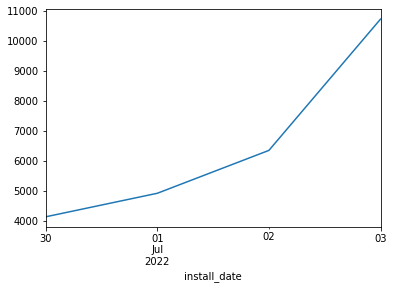

In [ ]:
df_churn['install_date']=pd.to_datetime(df_churn['install_date'])
usuarios =df_churn.groupby(df_churn['install_date'].dt.to_period('D')).size()
usuarios.plot.line()

In [ ]:
df_churn.describe()

,event_1,event_2,event_3,event_4,event_5,event_7
count,26130.000000,26130.000000,26130.000000,26130.000000,26130.000000,26130.000000
mean,1.947034,2.432109,4.685151,7.121814,0.524416,0.010112
std,1.717669,2.288888,5.804232,9.283248,1.061053,0.013624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,3.000000,3.000000,0.000000,0.004492
75%,3.000000,4.000000,6.000000,10.000000,1.000000,0.014214
max,11.000000,11.000000,33.000000,51.000000,5.000000,0.072377


#### Apertura según motivo de instalación

In [ ]:
pie_org=df_churn[['churn_target','source_type']]
pie_org = pie_org.groupby('source_type').agg('count')
pie_org

,churn_target
source_type,
Non Organic,13348
Organic,12782


<ipython-input-23-90c3afdbf68d>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(pie_org,autopct='%.1f%%',textprops={'size': 'x-large',"color":"white","weight":"bold"})


Text(0.5, 1.0, 'Motivo de Instalación')

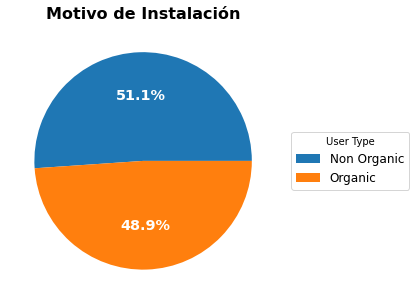

In [ ]:
columns=pie_org.index
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize =(5, 5))
ax1.pie(pie_org,autopct='%.1f%%',textprops={'size': 'x-large',"color":"white","weight":"bold"})
ax1.legend(columns, title="User Type", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
ax1.set_title("Motivo de Instalación",fontsize=16,fontweight="bold")

Inicialmente parecería que los usuarios que instalan de forma no organica tienen una mayor tendencia a Churnear

#### Apertura según plataforma

In [ ]:
pie_plat=df_churn[['churn_target','platform']]
pie_plat = pie_plat.groupby('platform').agg('count')
pie_plat

,churn_target
platform,
Android,24052
iOS,2078


<ipython-input-25-029327c6b724>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(pie_plat,autopct='%.1f%%',textprops={'size': 'x-large',"color":"white","weight":"bold"})


Text(0.5, 1.0, 'Plataforma')

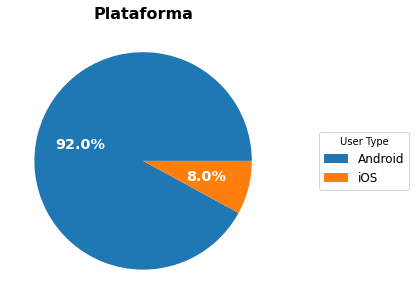

In [ ]:
columns=pie_plat.index
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize =(5, 5))
ax1.pie(pie_plat,autopct='%.1f%%',textprops={'size': 'x-large',"color":"white","weight":"bold"})
ax1.legend(columns, title="User Type", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
ax1.set_title("Plataforma",fontsize=16,fontweight="bold")

Aca observamos que una mayor cantidad de usuarios de Android Churnean. Esto parecería indicar una relación entre plataforma y Churning pero más adelante verermos porqué esta relación no es tan clara como parece

#### Apertura por provincia

A continuación analizaremos si el comportamiento de los usuarios varía geograficamente respecto a la tendencia a Churning. Para esto debemos primero agrupar por provincia

In [ ]:
df_prov=df_churn.groupby("country_region").agg({"user_id":"count","churn_target":"count"}).sort_values("user_id",ascending=False)
df_prov["id_cum"]=df_prov.user_id.cumsum()
a=df_prov['id_cum'].max()*0.8
df_prov=df_prov[df_prov["id_cum"]<a]
df_prov.rename(index={'Buenos Aires':'BA'},inplace=True)
df_prov.rename(index={'Buenos Aires F.D.':'CABA'},inplace=True)
df_prov

,user_id,churn_target,id_cum
country_region,,,
BA,10416,10416,10416
CABA,3377,3377,13793
Cordoba,2689,2689,16482
Santa Fe,1870,1870,18352
Mendoza,1188,1188,19540
Tucuman,738,738,20278


Text(0.5, 1.0, 'Apertura por provincia')

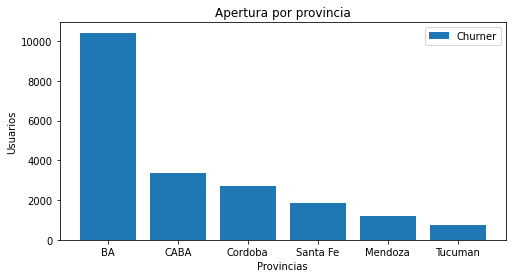

In [ ]:
x=df_prov.index
y1=df_prov.churn_target

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y1, label='Churner')
ax.legend(loc='best')
ax.set_ylabel("Usuarios")
ax.set_xlabel("Provincias")
ax.set_title('Apertura por provincia')

Vemos que el mayor volumen de churners se da Buenos Aires. Al igual que en el caso anterior nos está faltando una pieza. Por eso a continuación evaluaremos tanto los usuarios que churnean como los que no.

### Analisis Bivariado

En la etapa anterior pudimos entender un poco mas la natraleza de nuestra base pero para enriquecer mas el analisis evaluaremos no solo a los Churners si no tambien a los Non Churners

#### Apertura según motivo de instalación

Que tipo de usuario es mas propenso a hacer Churn al dia 1? Los organicos o los pagos?

In [ ]:
df_graph=df_sin_nulos
df_graph["Churner"] = np.where(df_graph["churn_target"]=="Churner",1,0)
df_graph["Non_Churner"] = np.where(df_graph["churn_target"]=="Non Churner",1,0)
df_source_type = df_graph.groupby("source_type").agg({"Churner":"sum","Non_Churner":"sum"})
df_source_type.head()


,Churner,Non_Churner
source_type,,
Non Organic,13348,9365
Organic,12782,13866


Text(0.5, 1.0, 'NON ORGANIC')

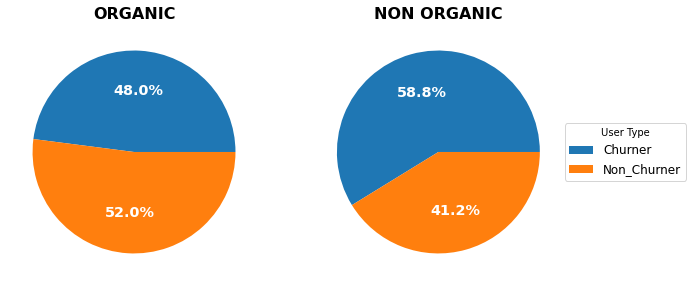

In [ ]:
organic=df_source_type.loc["Organic"]
non_organic=df_source_type.loc["Non Organic"]
columns=df_source_type.columns
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize =(10, 10))
ax1.pie(organic,autopct='%.1f%%',textprops={'size': 'x-large',"color":"white","weight":"bold"})
ax2.pie(non_organic,autopct='%.1f%%',textprops={'size': 'x-large',"color":"white","weight":"bold"})
ax2.legend(columns, title="User Type", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
ax1.set_title("ORGANIC",fontsize=16,fontweight="bold")
ax2.set_title("NON ORGANIC",fontsize=16,fontweight="bold")

Aquí se puede observar que aqullos usuarios que una mayor cantidad de usuarios que instalaron la aplicación de forma orgánica, es decir, que no entraron a la tienda desde un banner externo, volvieron a utilizar la aplicación al día siguiente a la instalación.

#### Apertura según plataforma

In [ ]:
df_plat=df_graph.groupby("platform").agg({"user_id":"count","Churner":"sum","Non_Churner":"sum"}).sort_values("user_id",ascending=False)
df_plat["id_cum"]=df_plat.user_id.cumsum()
df_plat

,user_id,Churner,Non_Churner,id_cum
platform,,,,
Android,44924,24052,20872,44924
iOS,4437,2078,2359,49361


Text(0.5, 1.0, 'Apertura por plataforma')

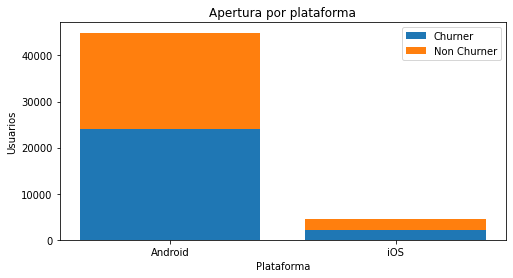

In [ ]:
x=df_plat.index
y1=df_plat.Churner
y2=df_plat.Non_Churner

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y1, label='Churner')
ax.bar(x, y2, label='Non Churner',  bottom=y1)
ax.legend(loc='best')
ax.set_ylabel("Usuarios")
ax.set_xlabel("Plataforma")
ax.set_title('Apertura por plataforma')

A diferencia del analisis de Churners por plataforma, acá podemos ver que la proporción de Churn/NoChurn se mantiene por plataforma, la diferencia es que la base de usuarios en Android supera ampliamente a la de iOS

####Apertura por región

Teniendo en mente lo que pasó en el grafico anterior, volvemos a analizar el fenomeno de Churning por provincia

In [ ]:
df1=df_graph
df1=df1.groupby("country_region").agg({"user_id":"count","Churner":"sum","Non_Churner":"sum"}).sort_values("user_id",ascending=False)
df1["id_cum"]=df1.user_id.cumsum()
a=df1['id_cum'].max()*0.8
df1=df1[df1["id_cum"]<a]
df1.rename(index={'Buenos Aires':'BA'},inplace=True)
df1.rename(index={'Buenos Aires F.D.':'CABA'},inplace=True)
df1

,user_id,Churner,Non_Churner,id_cum
country_region,,,,
BA,18421,10416,8005,18421
CABA,7459,3377,4082,25880
Cordoba,5158,2689,2469,31038
Santa Fe,3361,1870,1491,34399
Mendoza,2255,1188,1067,36654
Tucuman,1408,738,670,38062
Entre Rios,1320,717,603,39382


Text(0.5, 1.0, 'Apertura por provincia')

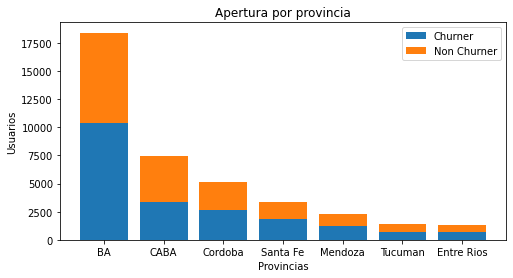

In [ ]:
x=df1.index
y1=df1.Churner
y2=df1.Non_Churner

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y1, label='Churner')
ax.bar(x, y2, label='Non Churner',  bottom=y1)
ax.legend(loc='best')
ax.set_ylabel("Usuarios")
ax.set_xlabel("Provincias")
ax.set_title('Apertura por provincia')

Igual que con el caso de la paertura por plataforma, en principio no se observa una variación entre la apertura de Churners/Non Churners al separar la base de usuarios en región. Lo que si observamos es como se ditribuye la base total de usuarios por región.

#### Interpretar la salida de un modelo linear

In [ ]:
df_sin_nulos.columns

Index(['install_date', 'user_id', 'platform', 'source_type', 'country',
       'country_region', 'is_pro', 'event_1', 'event_2', 'event_3', 'event_4',
       'event_5', 'event_7', 'churn_target', 'Churner', 'Non_Churner'],
      dtype='object')

In [ ]:

from   scipy import stats
import statsmodels.formula.api as sm

In [ ]:
model1 = 'event_1~churn_target'
lm1   = sm.ols(formula = model1, data = df_sin_nulos).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                event_1   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                 1.664e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:07:59   Log-Likelihood:            -1.1070e+05
No. Observations:               49361   AIC:                         2.214e+05
Df Residuals:                   49359   BIC:                         2.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Al tratarse de una problema de Clasificacion, dado que la variable a predecir es categorica (Churnea/No Churnea), lo que necesitamos mas que una regresion lineal es otra estrategia para resolver el problema, un arbol de decision, por ejemplo.

#### Analisis de correlación

In [ ]:
df_final.head()

,install_date,user_id,country,country_region,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,Churner
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,ar,Buenos Aires,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,0,1
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,ar,Buenos Aires,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,0,1
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,ar,Mendoza,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,0,1
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,ar,Santa Fe,5.0,5.0,14.0,21.0,0.0,0.030425,1,0,0,0
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,ar,Santa Fe,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,0,1


Veamos primero como se comportan las variables numericas en relacion al output "Churner", en busqueda de Insights.

In [ ]:
df_pearson = df_final.drop(['install_date', 'user_id', 'country','country_region',], axis=1)
df_pearson.head()

,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,Churner
0,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,0,1
1,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,0,1
2,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,0,1
3,5.0,5.0,14.0,21.0,0.0,0.030425,1,0,0,0
4,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,0,1


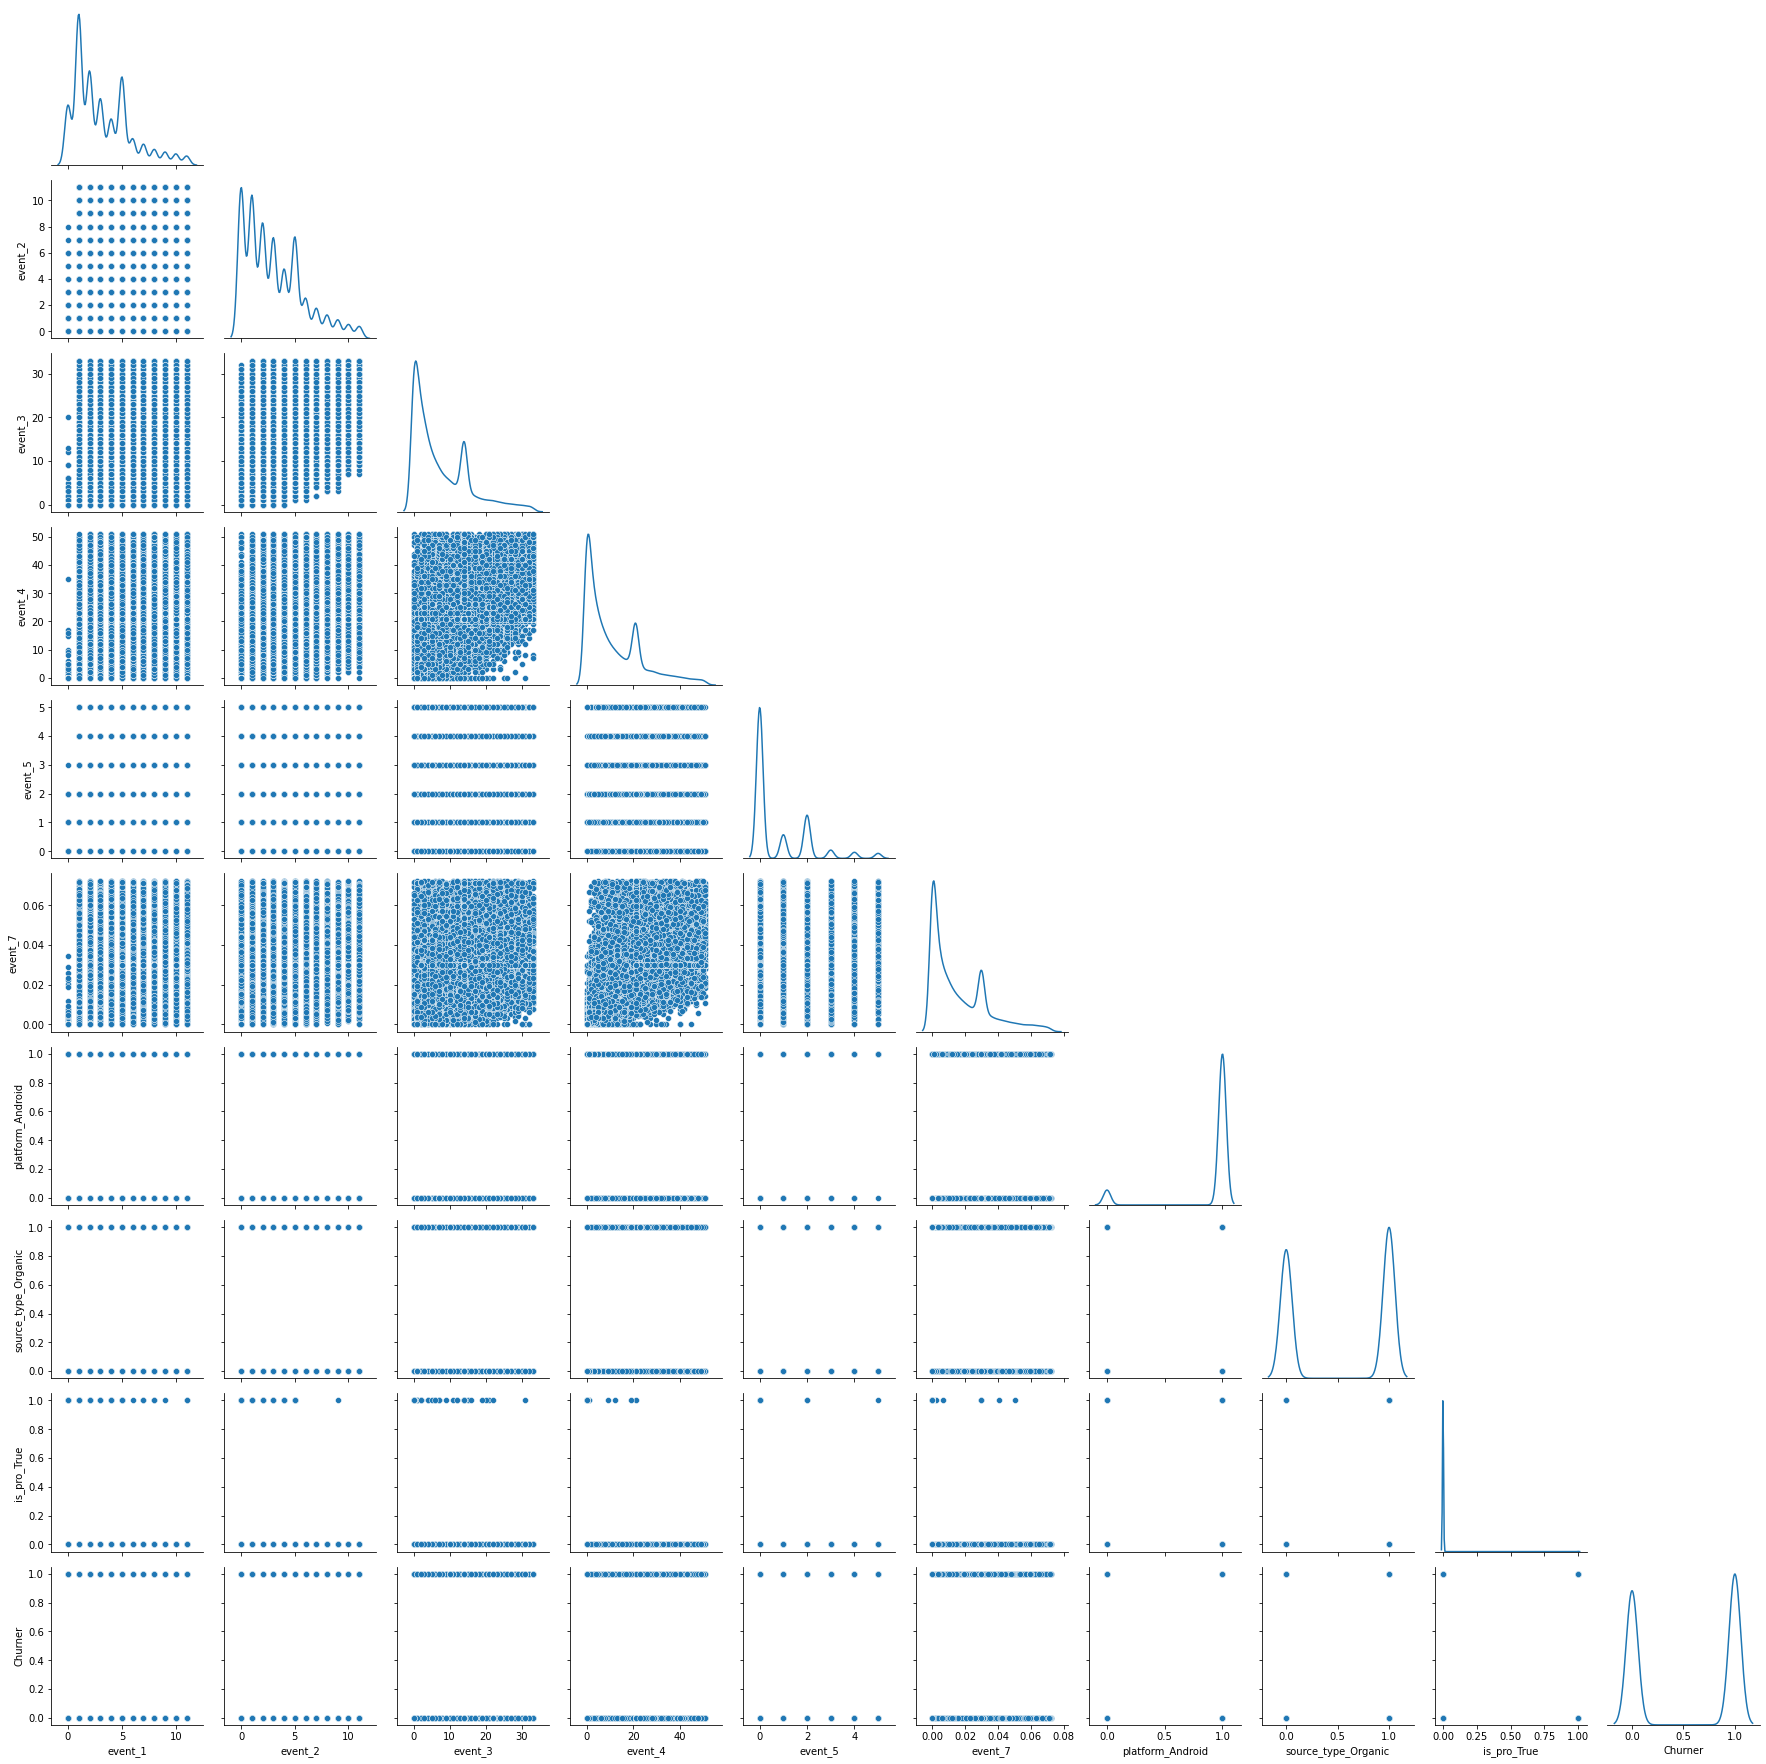

In [ ]:
g = sns.PairGrid(df_pearson, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

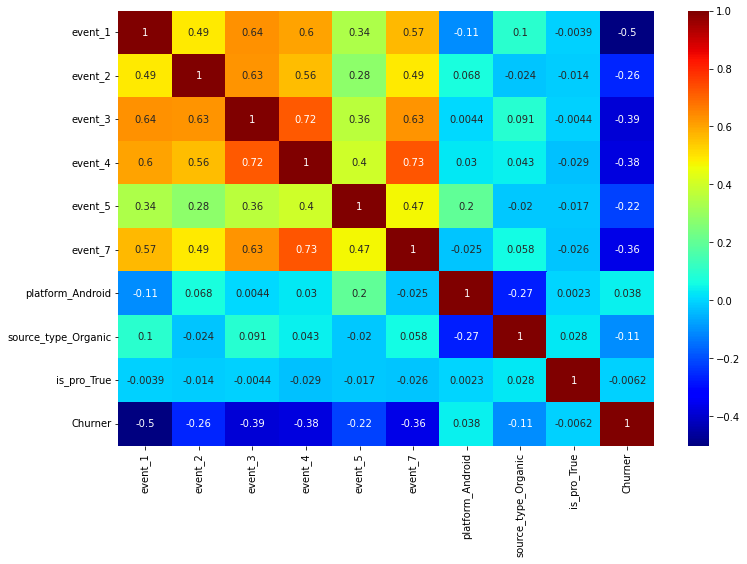

In [ ]:
#Correlaciones de Pearson
plt.figure(figsize=(12, 8))
df_corr = df_pearson.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True,cmap='jet');

Podemos ver que todos los eventos tienen una correlacion negativa con el futuro Churn de los usuarios, pero positiva entre ellos.

Es decir, un usuario que hace muchos event_1 probablemente haga muchos event_2. Y un usuario que haga muchos eventos tiene menos probabilidades de Churnear al dia 1.

Veamos ahora la significancia.

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = df_pearson.corr()
rho

,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,Churner
event_1,1.000000,0.494884,0.635878,0.601736,0.337062,0.569611,-0.106035,0.099925,-0.003870,-0.502127
event_2,0.494884,1.000000,0.627725,0.560447,0.281459,0.494502,0.068146,-0.024265,-0.013703,-0.259094
event_3,0.635878,0.627725,1.000000,0.718419,0.363556,0.627064,0.004411,0.091009,-0.004362,-0.389618
event_4,0.601736,0.560447,0.718419,1.000000,0.396925,0.728244,0.030214,0.042631,-0.028991,-0.376785
event_5,0.337062,0.281459,0.363556,0.396925,1.000000,0.471613,0.197122,-0.020241,-0.017306,-0.219431
event_7,0.569611,0.494502,0.627064,0.728244,0.471613,1.000000,-0.025275,0.058474,-0.026213,-0.363711
platform_Android,-0.106035,0.068146,0.004411,0.030214,0.197122,-0.025275,1.000000,-0.271383,0.002343,0.038427
source_type_Organic,0.099925,-0.024265,0.091009,0.042631,-0.020241,0.058474,-0.271383,1.000000,0.027800,-0.107863
is_pro_True,-0.003870,-0.013703,-0.004362,-0.028991,-0.017306,-0.026213,0.002343,0.027800,1.000000,-0.006183
Churner,-0.502127,-0.259094,-0.389618,-0.376785,-0.219431,-0.363711,0.038427,-0.107863,-0.006183,1.000000


In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = df_pearson.corr()
pval = df_pearson.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape) # quitar de la diagonal los unos con np.eye
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01] if x<=t]))
rho.round(2).astype(str) + p

,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,Churner
event_1,1.0*,0.49*,0.64*,0.6*,0.34*,0.57*,-0.11*,0.1*,-0.0,-0.5*
event_2,0.49*,1.0*,0.63*,0.56*,0.28*,0.49*,0.07*,-0.02*,-0.01*,-0.26*
event_3,0.64*,0.63*,1.0*,0.72*,0.36*,0.63*,0.0,0.09*,-0.0,-0.39*
event_4,0.6*,0.56*,0.72*,1.0*,0.4*,0.73*,0.03*,0.04*,-0.03*,-0.38*
event_5,0.34*,0.28*,0.36*,0.4*,1.0*,0.47*,0.2*,-0.02*,-0.02*,-0.22*
event_7,0.57*,0.49*,0.63*,0.73*,0.47*,1.0*,-0.03*,0.06*,-0.03*,-0.36*
platform_Android,-0.11*,0.07*,0.0,0.03*,0.2*,-0.03*,1.0*,-0.27*,0.0,0.04*
source_type_Organic,0.1*,-0.02*,0.09*,0.04*,-0.02*,0.06*,-0.27*,1.0*,0.03*,-0.11*
is_pro_True,-0.0,-0.01*,-0.0,-0.03*,-0.02*,-0.03*,0.0,0.03*,1.0*,-0.01
Churner,-0.5*,-0.26*,-0.39*,-0.38*,-0.22*,-0.36*,0.04*,-0.11*,-0.01,1.0*


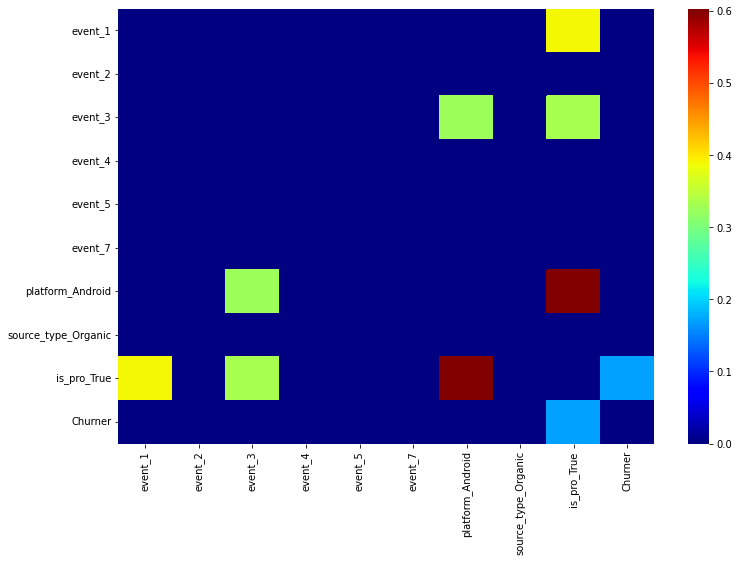

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pval,cmap='jet')

## Insights Obtenidos

- No se ven diferencias significativas en el futuro Churn de los usuarios dependiendo de las variables categoricas
- Hay una fuerte correlacion entre la cantidad de eventos realizados en el dia 0 y el futuro Churn, a mayor cantidad de eventos, menos chances de churnear.
- Los eventos entre si estan correlacionados positivamente, es decir, a mayor cantidad de eventos 1, mayor cantidad de eventos 2.
- El evento 6 es despreciable, dado que no aporta nada al analisis.

## Desarrollando un modelo de Machine Learning

In [ ]:
#Vuelvo a cargar el DS para traer los casos por resolver

import pandas as pd
import numpy as np
sheet_url = "https://docs.google.com/spreadsheets/d/11CRwxEJD5LV4WcRyqNJiMriwt8KfTVXgnjlECkAr6Q8/export?format=csv&gid=666920416"
ds1 = pd.read_csv(sheet_url, sep=",",index_col=0)
ds1.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_6,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1,1,1,1,0,0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3,7,8,6,5,0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1,6,6,6,0,0,0.009298,Churner
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,Android,Non Organic,ar,Santa Fe,False,12,14,46,65,0,0,0.030425,Non Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3,9,9,20,0,0,0.009078,Churner


Feature Engineering - Imputacion

In [ ]:
#Borrado de duplicados
print(ds1.shape)
df_sin_duplicados= ds1.drop_duplicates()
print(df_sin_duplicados.shape)

(61915, 15)
(61915, 15)


Tratamiento de Nulos

In [ ]:
#Analisis de nulos
#Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_sin_duplicados.isnull().sum()/df_sin_duplicados.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

is_pro            1.629654
country_region    0.276185
dtype: float64

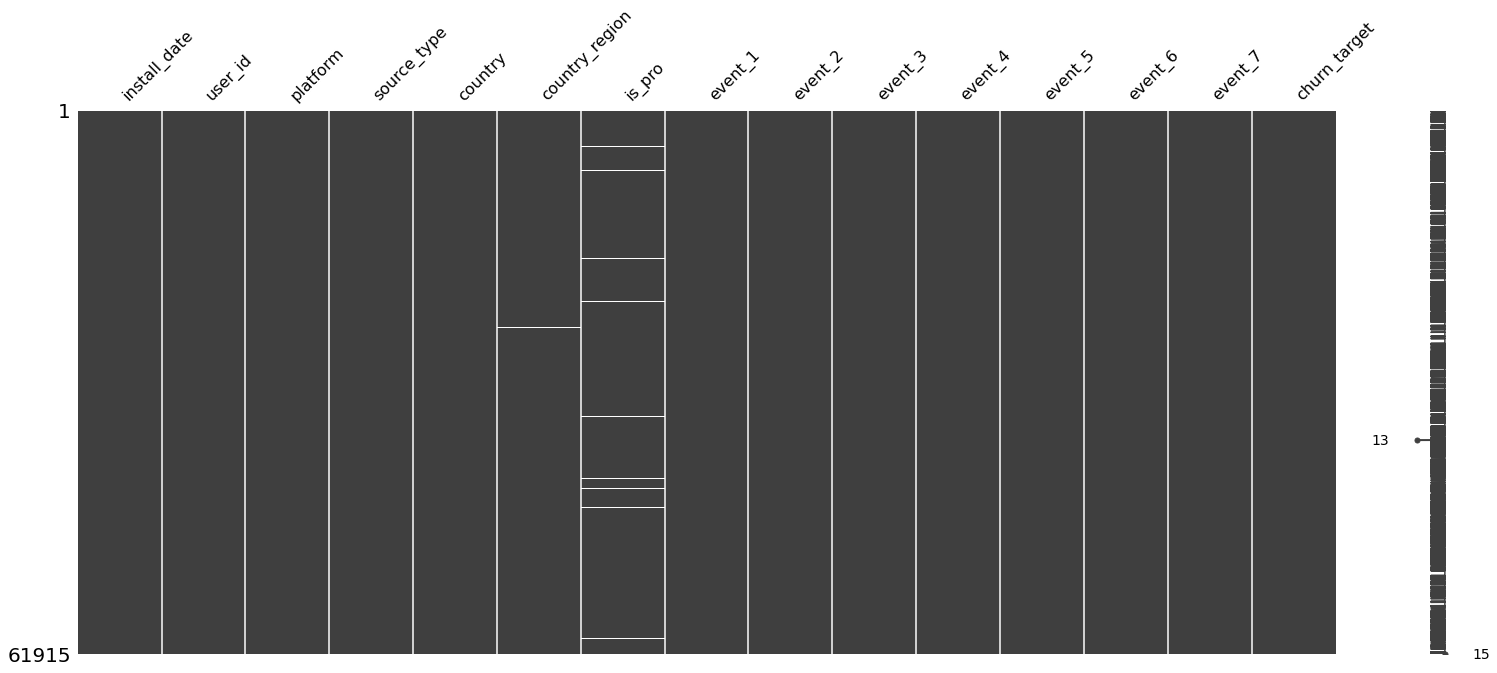

In [ ]:
import missingno as msno
msno.matrix(df_sin_duplicados)

In [ ]:
df_sin_nulos = df_sin_duplicados.dropna()

(60736, 15)
(60736, 15)


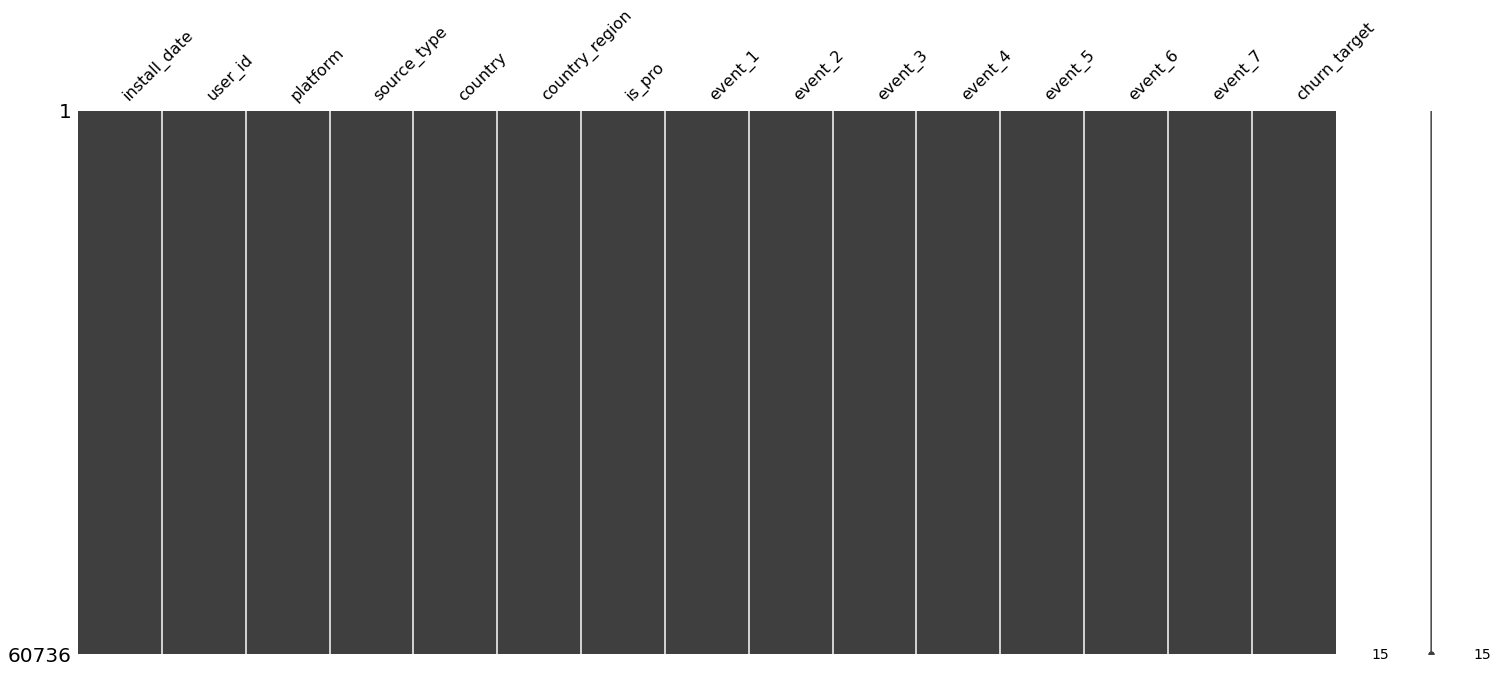

In [ ]:
#Revisamos
print(df_sin_nulos.shape)
train= df_sin_nulos.dropna()
print(train.shape)
msno.matrix(df_sin_nulos)

Tratamiento de outliers

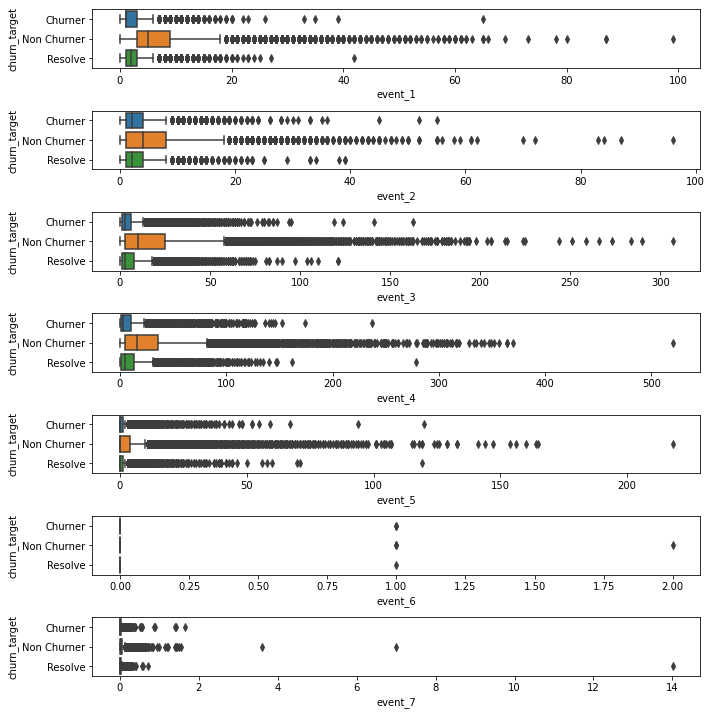

In [ ]:
#Vamos a ver si las variables numericas tienen outliers
import seaborn as sns
import matplotlib.pyplot as plt

f, axs = plt.subplots(7, 1, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4]))
box_1 = sns.boxplot(data=df_sin_nulos, x="event_1", y="churn_target",  ax=axs[0])
box_2 = sns.boxplot(data=df_sin_nulos, x="event_2", y="churn_target",  ax=axs[1])
box_3 = sns.boxplot(data=df_sin_nulos, x="event_3", y="churn_target",  ax=axs[2])
box_4 = sns.boxplot(data=df_sin_nulos, x="event_4", y="churn_target",  ax=axs[3])
box_5 = sns.boxplot(data=df_sin_nulos, x="event_5", y="churn_target",  ax=axs[4])
box_6 = sns.boxplot(data=df_sin_nulos, x="event_6", y="churn_target",  ax=axs[5])
box_7 = sns.boxplot(data=df_sin_nulos, x="event_7", y="churn_target",  ax=axs[6])
f.tight_layout()

In [ ]:
import numpy as np
def imputar_outliers_IQR(df_sin_nulos):
   q1=df_sin_nulos.quantile(0.25)
   q3=df_sin_nulos.quantile(0.75)
   IQR=q3-q1
   upper = df_sin_nulos[~(df_sin_nulos>(q3+1.5*IQR))].max()
   lower = df_sin_nulos[~(df_sin_nulos<(q1-1.5*IQR))].min()
   df_sin_nulos = np.where(df_sin_nulos > upper, # si el valor es mayor al q3
                 df_sin_nulos.quantile(0.75), # remplazar por el limite superior
                 np.where(df_sin_nulos < lower, # en caso contrario si es menor que el lower limit
                          df_sin_nulos.quantile(0.25), # reemplazar por el limita inferior
                          df_sin_nulos) # si ninguna de las dos cosas anteriores ocurre dejar el dato
                 )
   return df_sin_nulos

In [ ]:
prueba = df_sin_nulos[['event_1','event_2','event_3','event_4','event_5','event_6','event_7']]
prueba.columns

Index(['event_1', 'event_2', 'event_3', 'event_4', 'event_5', 'event_6',
       'event_7'],
      dtype='object')

In [ ]:
columnas=prueba.columns
df_sin_nulos[columnas]=imputar_outliers_IQR(df_sin_nulos[columnas])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


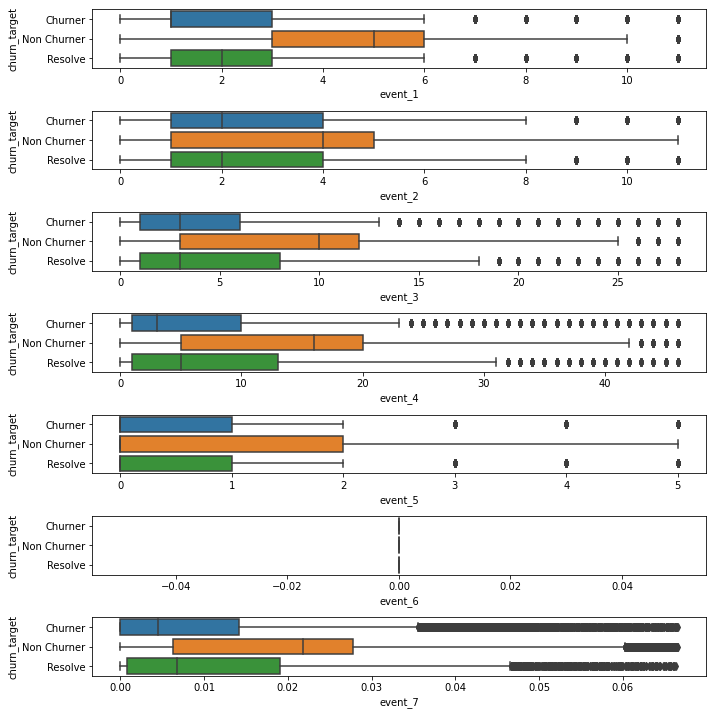

In [ ]:
#vuelvo a chequear outliers

f, axs = plt.subplots(7, 1, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4]))
box_1 = sns.boxplot(data=df_sin_nulos, x="event_1", y="churn_target",  ax=axs[0])
box_2 = sns.boxplot(data=df_sin_nulos, x="event_2", y="churn_target",  ax=axs[1])
box_3 = sns.boxplot(data=df_sin_nulos, x="event_3", y="churn_target",  ax=axs[2])
box_4 = sns.boxplot(data=df_sin_nulos, x="event_4", y="churn_target",  ax=axs[3])
box_5 = sns.boxplot(data=df_sin_nulos, x="event_5", y="churn_target",  ax=axs[4])
box_6 = sns.boxplot(data=df_sin_nulos, x="event_6", y="churn_target",  ax=axs[5])
box_7 = sns.boxplot(data=df_sin_nulos, x="event_7", y="churn_target",  ax=axs[6])
f.tight_layout()

In [ ]:
df_sin_nulos = df_sin_nulos.drop(['event_6'],axis = 1)
df_sin_nulos.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1.0,1.0,1.0,1.0,0.0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3.0,7.0,8.0,6.0,5.0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1.0,6.0,6.0,6.0,0.0,0.009298,Churner
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,Android,Non Organic,ar,Santa Fe,False,5.0,5.0,12.0,19.0,0.0,0.030425,Non Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3.0,9.0,9.0,20.0,0.0,0.009078,Churner


### Encoding

Usamos el metodo get dummies para quedarnos solo con variables del tipo dummie

In [ ]:
#Chequeo
df_sin_resolve.groupby('churn_target').nunique()#Para esta etapa nos quedaremos solo con los usuarios que tienen el tag de Churner/Non Churner

df_sin_resolve = df_sin_nulos.loc[df_sin_nulos['churn_target']!= 'Resolve']
df_sin_resolve.head()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_7,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,Android,Non Organic,ar,Buenos Aires,False,1.0,1.0,1.0,1.0,0.0,0.000000,Churner
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,Android,Non Organic,ar,Buenos Aires,False,3.0,7.0,8.0,6.0,5.0,0.014865,Churner
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,Android,Non Organic,ar,Mendoza,False,1.0,6.0,6.0,6.0,0.0,0.009298,Churner
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,Android,Non Organic,ar,Santa Fe,False,5.0,5.0,12.0,19.0,0.0,0.030425,Non Churner
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,Android,Non Organic,ar,Santa Fe,False,3.0,9.0,9.0,20.0,0.0,0.009078,Churner


In [ ]:
#Chequeo
df_sin_resolve.groupby('churn_target').nunique()

,install_date,user_id,platform,source_type,country,country_region,is_pro,event_1,event_2,event_3,event_4,event_5,event_7
churn_target,,,,,,,,,,,,,
Churner,4,23490,2,2,1,26,2,12,12,29,47,6,15578
Non Churner,4,17660,2,2,1,25,2,12,12,29,47,6,15533


In [ ]:
df_sin_resolve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49361 entries, 0 to 61914
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   install_date    49361 non-null  object 
 1   user_id         49361 non-null  object 
 2   platform        49361 non-null  object 
 3   source_type     49361 non-null  object 
 4   country         49361 non-null  object 
 5   country_region  49361 non-null  object 
 6   is_pro          49361 non-null  object 
 7   event_1         49361 non-null  float64
 8   event_2         49361 non-null  float64
 9   event_3         49361 non-null  float64
 10  event_4         49361 non-null  float64
 11  event_5         49361 non-null  float64
 12  event_7         49361 non-null  float64
 13  churn_target    49361 non-null  object 
dtypes: float64(6), object(8)
memory usage: 5.6+ MB


Vemos que columnas pueden ser convertidas a dummie y reemplazamos

In [ ]:
# columnas categoricas con dos unicas posibilidades
col_dummies=[x for x in df_sin_resolve.columns if (df_sin_resolve[x].dtype=='O' and len(df_sin_resolve[x].unique()) ==2)]
print(col_dummies)
# crear las variables dummies
df_dummies=pd.get_dummies(df_sin_resolve[col_dummies])
# concatenar con el dataframe original
df_final=pd.concat([df_sin_resolve,df_dummies],axis=1)
# Borrar de columnas originales
df_final=df_final.drop(columns=col_dummies)
df_final.head()

['platform', 'source_type', 'is_pro', 'churn_target']


,install_date,user_id,country,country_region,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,platform_iOS,source_type_Non Organic,source_type_Organic,is_pro_False,is_pro_True,churn_target_Churner,churn_target_Non Churner
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,ar,Buenos Aires,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,1,0,1,0,1,0
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,ar,Buenos Aires,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,1,0,1,0,1,0
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,ar,Mendoza,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,1,0,1,0,1,0
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,ar,Santa Fe,5.0,5.0,12.0,19.0,0.0,0.030425,1,0,1,0,1,0,0,1
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,ar,Santa Fe,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,1,0,1,0,1,0


Observamos que algunas columnas son redundantes como "is_pro_True" y "is_pro_False". Para simplificar la base, eliminamos las columnas redundantes

In [ ]:
df_final=df_final.drop(['platform_iOS','source_type_Non Organic',"is_pro_False","churn_target_Non Churner"], axis = 1)
df_final = df_final.rename(columns = {'churn_target_Churner':'churn_target'})
df_final.head()

,install_date,user_id,country,country_region,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,ar,Buenos Aires,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,0,1
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,ar,Buenos Aires,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,0,1
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,ar,Mendoza,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,0,1
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,ar,Santa Fe,5.0,5.0,12.0,19.0,0.0,0.030425,1,0,0,0
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,ar,Santa Fe,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,0,1


In [ ]:
#De las entregas pasadas, sabemos que no varia el porcentaje de usuarios nulos por pais ni region, asi que vamos a eliminar esas columnas para el entrenamiento del modelo

df_final = df_final.drop(['country','country_region'], axis = 1)
df_final.head()

,install_date,user_id,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True,churn_target
0,2022-07-02,db4accbd3e43c2836551d51b7cd3148d15ed8745,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,0,1
1,2022-07-01,11ea3c8698958e0f679d0ec708d0e7989119af9d,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,0,1
2,2022-07-02,75be8a2835ca0be9c05ac4bfd2064b354cdd3b07,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,0,1
3,2022-07-02,345a5dbbef5667a77f7b141271570c9566f91022,5.0,5.0,12.0,19.0,0.0,0.030425,1,0,0,0
4,2022-07-02,0b88bf20b5e4a6db01d6d3a52f51b899b134a82f,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,0,1


Ahora contamos con un dataset limpio de nulos y outliers, y con las variables en un modo mucho mas util y adecuado para trabajar en el proyecto.

### Entrenamiento de un modelo de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
X=df_final[['event_1','event_2','event_3','event_4','event_5','event_7','platform_Android','source_type_Organic','is_pro_True']]
y= df_final['churn_target'].astype('str')

In [ ]:
X.head()

,event_1,event_2,event_3,event_4,event_5,event_7,platform_Android,source_type_Organic,is_pro_True
0,1.0,1.0,1.0,1.0,0.0,0.000000,1,0,0
1,3.0,7.0,8.0,6.0,5.0,0.014865,1,0,0
2,1.0,6.0,6.0,6.0,0.0,0.009298,1,0,0
3,5.0,5.0,12.0,19.0,0.0,0.030425,1,0,0
4,3.0,9.0,9.0,20.0,0.0,0.009078,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
arbol = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=100,criterion='gini')
arbol.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [ ]:
# Obtengo predicciones
y_pred= arbol.predict(X_test)

In [ ]:
from sklearn import metrics # Medimos el desempeño
print(metrics.classification_report(y_pred=y_pred, y_true= y_test)) # Obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.80      0.68      0.74      7737
           1       0.74      0.85      0.79      8553

    accuracy                           0.77     16290
   macro avg       0.77      0.76      0.76     16290
weighted avg       0.77      0.77      0.77     16290



In [ ]:
feature_names = X_test.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names

Index(['event_1', 'event_2', 'event_3', 'event_4', 'event_5', 'event_7',
       'platform_Android', 'source_type_Organic', 'is_pro_True'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

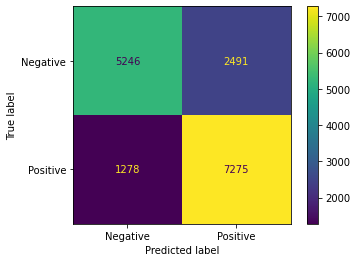

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(arbol, X_test, y_test, display_labels=['Negative', 'Positive'])

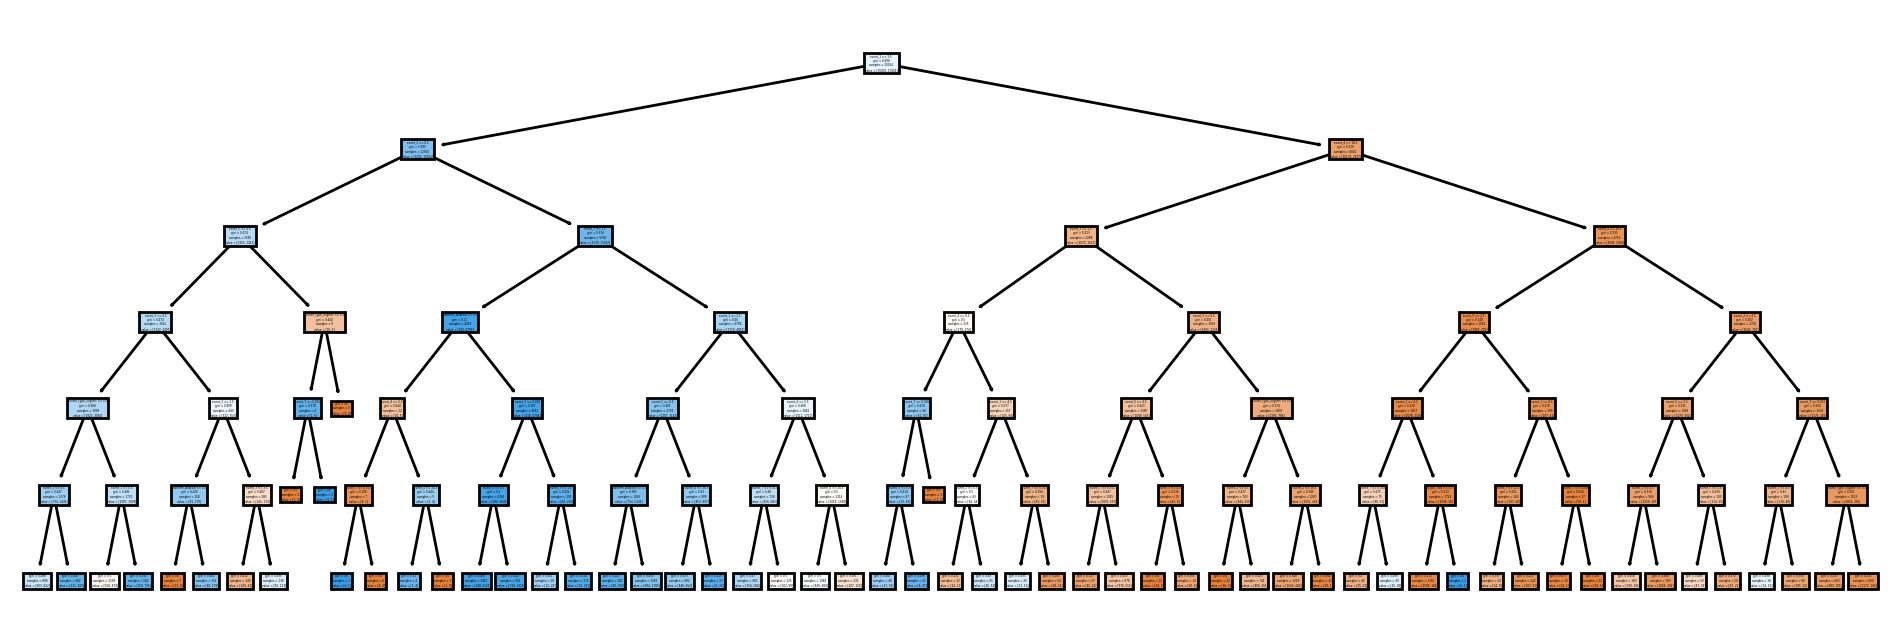

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
tree.plot_tree(arbol.estimators_[0], feature_names=feature_names, filled=True) # Graficamos el arbol del modelo dtc con los feature names obtenidos
plt.show()

### Evaluando un modelo de Machine Learning

Evaluemos las metricas del modelo anterior

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.7686310620012278


In [ ]:
from sklearn.metrics import precision_score
print('precision:',precision_score(y_test, y_pred, pos_label = '1') )

precision: 0.744931394634446


In [ ]:
from sklearn.metrics import recall_score
print('recall:',recall_score(y_test, y_pred, pos_label = '1')) 

recall: 0.8505787443002455


In [ ]:
from sklearn.metrics import f1_score
print('f1_score:',f1_score(y_test, y_pred,pos_label = '1') )

f1_score: 0.7942573284567934


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

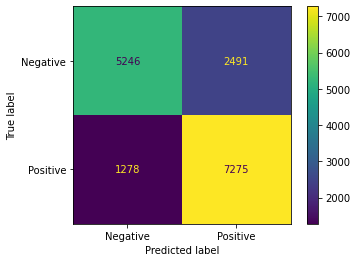

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(arbol, X_test, y_test, display_labels=['Negative', 'Positive'])

Si bien la precision del modelo es baja (74%), dada la naturaleza del problema, a nosotros nos interesa mas detectar cuando un usuario va a churnear, que cuando no lo va a ser.

Esto es debido a que si predecimos que un usuario no va a volver, podemos generar acciones para tratar de retenerlo, mientras que si despues decide volver por si cuenta, nos sigue sirviendo.

En cambio, si a un usuario se lo taguea como Non churner y luego decide no volver, ya no es posible generar ninguna accion.

Con esto en mente priorizamos la metrica de Recall que en este caso da un mejor valor que la precisión total (85%)

Feature Importances

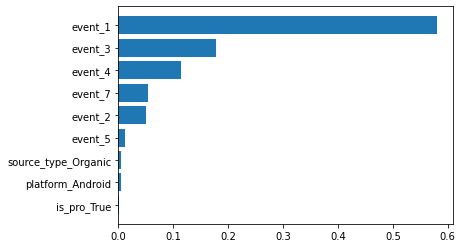

In [ ]:
# Seleccion de Feature importances del modelo de Random Forest
importances = arbol.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

Hiperparametros para Random Forrest

In [ ]:
arbol.get_params()  # comenzamos obteniendo los parametros que podriamos ajustar

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'macro')}

parametros = {"criterion":("gini","entropy"),
              "n_estimators":(100, 200, 300),
              "max_samples":(1/3, 2/3)              
              }

GridSearch = GridSearchCV(arbol, parametros, scoring = scoring, refit='f1')
GridSearch.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(max_depth=6, random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (100, 200, 300)},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [ ]:
sorted(GridSearch.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_accuracy',
 'mean_test_f1',
 'mean_test_precision',
 'mean_test_recall',
 'param_criterion',
 'param_max_samples',
 'param_n_estimators',
 'params',
 'rank_test_accuracy',
 'rank_test_f1',
 'rank_test_precision',
 'rank_test_recall',
 'split0_test_accuracy',
 'split0_test_f1',
 'split0_test_precision',
 'split0_test_recall',
 'split1_test_accuracy',
 'split1_test_f1',
 'split1_test_precision',
 'split1_test_recall',
 'split2_test_accuracy',
 'split2_test_f1',
 'split2_test_precision',
 'split2_test_recall',
 'split3_test_accuracy',
 'split3_test_f1',
 'split3_test_precision',
 'split3_test_recall',
 'split4_test_accuracy',
 'split4_test_f1',
 'split4_test_precision',
 'split4_test_recall',
 'std_fit_time',
 'std_score_time',
 'std_test_accuracy',
 'std_test_f1',
 'std_test_precision',
 'std_test_recall']

In [ ]:
GridSearch.cv_results_["params"]

[{'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 300},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 300},
 {'criterion': 'entropy',
  'max_samples': 0.3333333333333333,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_samples': 0.3333333333333333,
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_samples': 0.3333333333333333,
  'n_estimators': 300},
 {'criterion': 'entropy',
  'max_samples': 0.6666666666666666,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_samples': 0.6666666666666666,
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_samples': 0.6666666666666666,
  'n_estimators': 300}

In [ ]:
GridSearch.cv_results_['mean_test_accuracy']

array([0.76530059, 0.76588809, 0.76564499, 0.7651993 , 0.76505748,
       0.76534111, 0.76489541, 0.76560448, 0.7656855 , 0.76566523,
       0.76528032, 0.76560445])

In [ ]:
GridSearch.cv_results_['mean_test_precision']

array([0.76530059, 0.76588809, 0.76564499, 0.7651993 , 0.76505748,
       0.76534111, 0.76489541, 0.76560448, 0.7656855 , 0.76566523,
       0.76528032, 0.76560445])

In [ ]:
GridSearch.cv_results_['mean_test_recall']

array([0.76530059, 0.76588809, 0.76564499, 0.7651993 , 0.76505748,
       0.76534111, 0.76489541, 0.76560448, 0.7656855 , 0.76566523,
       0.76528032, 0.76560445])

Vemos que con hiperparametros no mejora mucho el rendimiento del Recall, dado que a nivel macro era de 76% tambien.

### Feature Seleccion - KCross

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Xk=X.values
yk=y.values

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(Xk, yk)

5

In [ ]:
train, test = list(skf.split(Xk, yk))[0]
test

array([   15,    17,    20, ..., 49343, 49349, 49358])

In [ ]:
Xk[test]

array([[ 2.,  1.,  1., ...,  1.,  0.,  0.],
       [ 6.,  1.,  1., ...,  1.,  0.,  0.],
       [ 9.,  3., 10., ...,  1.,  0.,  0.],
       ...,
       [ 3.,  1.,  1., ...,  0.,  1.,  0.],
       [ 2.,  1.,  1., ...,  0.,  1.,  0.],
       [ 3.,  0.,  1., ...,  0.,  1.,  0.]])

In [ ]:
#KFOLD
# Lista para guardar accuracy
list_rec=[]
for i in range(0,skf.get_n_splits(Xk, yk)):
  # Calculo de indices
  train, test = list(skf.split(Xk, yk))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= Xk[train], yk[train], Xk[test],yk[test]
  # Ajustar el modelo
  arbol.fit(X_train_n, y_train_n)
  # Predicciones
  kpred= arbol.predict(X_test_n)
  # Calculo del error
  recall= recall_score(y_true=y_test_n, y_pred= kpred, pos_label = '1')
  print('Iteracion: ',i+1, ' Recall:', recall)
  list_rec.append(recall)
# Promedio de accuracy
import numpy as np
print('Recall promedio:', np.mean(list_rec))

Iteracion:  1  Recall: 0.8379257558362035
Iteracion:  2  Recall: 0.8417527745885954
Iteracion:  3  Recall: 0.8488327592805205
Iteracion:  4  Recall: 0.8398392652123995
Iteracion:  5  Recall: 0.8398392652123995
Recall promedio: 0.8416379640260236


Se observa un resultado parejo a lo largo de las iteraciones

##Conclusión

Tras analizar el data set para entender el negocio y el problema solicitado por el cliente se pudo seleccionar un modelo para predecir con un nivel de performance adecuado la tendencia de un usuario a Churnear.

Con este modelo el cliente podrá focalizar de forma más efectiva acciones de marketing para retener a este tipos de usuarios.

A su vez creemos que este modelo puede a futuro alimentarse de más información para mejorar con el paso del tiempo su efectividad.